In [0]:
import pandas as pd
import numpy as np
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [0]:
sc.stop()

In [0]:
sc = SparkContext()
spark = SparkSession(sc)
sqlContext = SQLContext(sc)

In [0]:
bucket="s3://dsde6007.rahul/lat_longs.txt"

In [0]:
data = sc.textFile(bucket)

In [0]:
import re
def clean_data(data):
  data = data.split(" ")
  data[0] = re.sub("[^\d.-]+[.]{1}[^\d.]+", "delete", data[0])
  data = (data[0], data[1], data[2])

In [0]:
data = clean_data(data)

In [0]:
data.take(5)

[(36.7, 3.216666666666667, '<http://dbpedia.org/resource/Algeria>'),
 (42.5, 1.5166666666666666, '<http://dbpedia.org/resource/Andorra>'),
 (12.516666666666667,
  -70.03333333333333,
  '<http://dbpedia.org/resource/Aruba>'),
 (-8.833333333333334,
  13.333333333333334,
  '<http://dbpedia.org/resource/Angola>'),
 (41.333333333333336, 19.8, '<http://dbpedia.org/resource/Albania>')]

In [0]:
data.cache()

PythonRDD[3] at RDD at PythonRDD.scala:53

In [0]:
data = data.collect()

In [0]:
df = pd.DataFrame(data, columns=['Latitude','Longtitude','Site'])

In [0]:
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

In [0]:
df.head()

,Latitude,Longtitude,Site
0,36.700000,3.216667,<http://dbpedia.org/resource/Algeria>
1,42.500000,1.516667,<http://dbpedia.org/resource/Andorra>
2,12.516667,-70.033333,<http://dbpedia.org/resource/Aruba>
3,-8.833333,13.333333,<http://dbpedia.org/resource/Angola>
4,41.333333,19.800000,<http://dbpedia.org/resource/Albania>


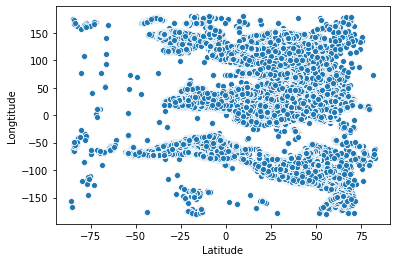

In [0]:
import seaborn as sns
ax = sns.scatterplot(x = df['Latitude'], y = df['Longitude'], data = df)